In [10]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
import torch
from Sphere import Sphere
from Euclidean import Euclidean
from ProductSpace import Product
from SPDMatrices import SPDMatrices

S = Sphere(2)
M = SPDMatrices(2)
R = Euclidean(2)
T= Product(M,S)
b = T.random(100)
print(S)
print(b.shape)
print(T.belongs(b).shape)
print(torch.all(T.belongs(b)))

torch.Size([7, 100])
torch.Size([100])
tensor(True)


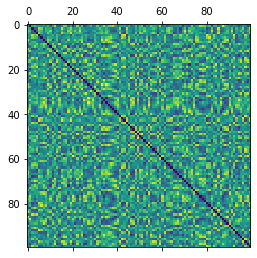

In [11]:
d=T.dissimilarity(b)
plt.matshow(d.numpy())
plt.show()

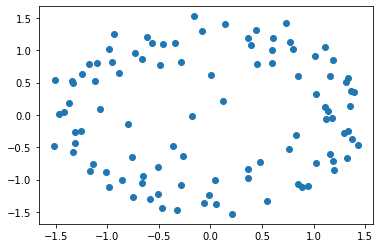

In [12]:
from sklearn.manifold import TSNE,MDS
X_embedded = MDS(n_components=2, dissimilarity='precomputed').fit_transform(((d+d.transpose(0,1))/2).numpy())
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()

In [13]:
from ConeSpace import ConeOverM
COverT = ConeOverM(T,1)
print(COverT)
print(COverT._metric)
c=COverT.random(100,10)
print(torch.all(COverT.belongs(c)))

tensor(True)


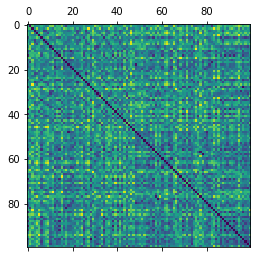

In [14]:
d=COverT.dissimilarity(c)
plt.matshow(d.numpy())
plt.show()
#print(d)

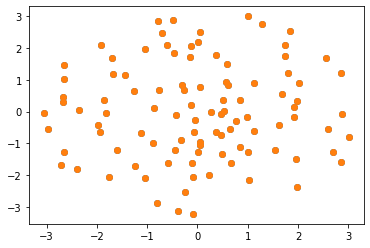

In [15]:

X_embedded = MDS(n_components=2, dissimilarity='precomputed').fit_transform(d.numpy())
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()

In [19]:
from MeasureSpace import MeasureSpace
MonT = MeasureSpace(T,4)
print(MonT)
print(MonT._metric)
e = MonT.random(10,20,10)
print(torch.all(MonT.belongs(e)))

tensor(True)


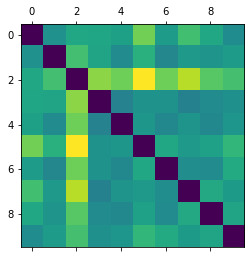

In [20]:
d = MonT.dissimilarity(e,max_steps=10000,eps=.00001)
plt.matshow(d.numpy())
plt.show()
#print(d)

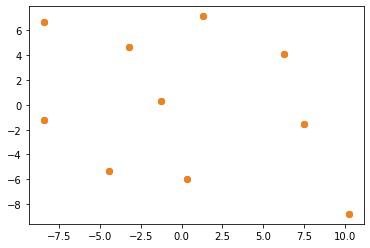

In [21]:
X_embedded = MDS(n_components=2, dissimilarity='precomputed').fit_transform(d.numpy())
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()